In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [122]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [123]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [125]:
Y_train

array([1, 8, 4, ..., 3, 4, 2])

In [126]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
def init_params():
    W1 = np.random.rand(15, 784) - 0.5
    b1 = np.random.rand(15, 1) - 0.5
    W2 = np.random.rand(10, 15) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
    
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z))

def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    dB1 = (1/m) * np.sum(dZ1)
    return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - (alpha * dW1)
    W2 = W2 - (alpha * dW2)
    B1 = B1 - (alpha * dB1)
    B2 = B2 - (alpha * dB2)
    return W1, B1, W2, B2


In [128]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descend(X, Y, iterations, alpha):
    W1, B1, W2, B2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, B1, W2, B2

In [129]:
W1, B1, W2, B2 = gradient_descend(X_train, Y_train, 500, 0.4)

Iteration:  0
[3 3 3 ... 1 3 3] [1 8 4 ... 3 4 2]
Accuracy:  0.0743170731707317
Iteration:  50
[1 8 9 ... 5 9 8] [1 8 4 ... 3 4 2]
Accuracy:  0.6732682926829269
Iteration:  100
[1 8 4 ... 5 6 8] [1 8 4 ... 3 4 2]
Accuracy:  0.7864146341463415
Iteration:  150
[1 8 4 ... 5 6 3] [1 8 4 ... 3 4 2]
Accuracy:  0.8156829268292682
Iteration:  200
[1 8 4 ... 5 6 3] [1 8 4 ... 3 4 2]
Accuracy:  0.8605121951219512
Iteration:  250
[1 8 4 ... 5 6 3] [1 8 4 ... 3 4 2]
Accuracy:  0.8722682926829268
Iteration:  300
[1 8 4 ... 5 6 3] [1 8 4 ... 3 4 2]
Accuracy:  0.8823414634146342
Iteration:  350
[1 8 4 ... 5 4 2] [1 8 4 ... 3 4 2]
Accuracy:  0.8913170731707317
Iteration:  400
[1 8 4 ... 5 4 2] [1 8 4 ... 3 4 2]
Accuracy:  0.8957073170731708
Iteration:  450
[1 8 4 ... 5 4 2] [1 8 4 ... 3 4 2]
Accuracy:  0.8979024390243903


In [130]:
def make_prediction(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    prediction = get_predictions(A2)
    return prediction

def test_prediction(index, W1, B1, W2, B2):
    current_image = X_train[:, index, None]
    prediction = make_prediction(current_image, W1, B1, W2, B2)
    label = Y_train[index]
    print("Prediction, ", prediction)
    print("label, ", label)
    current_image = current_image.reshape((28, 28)) * 255
    #plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction,  [9]
label,  7


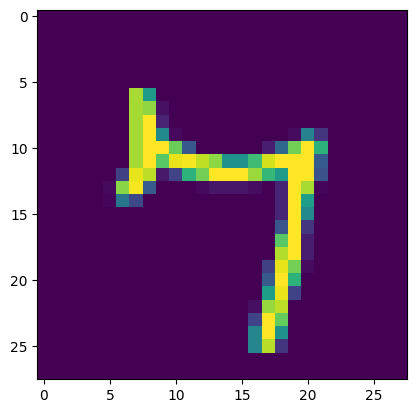

Prediction,  [6]
label,  6


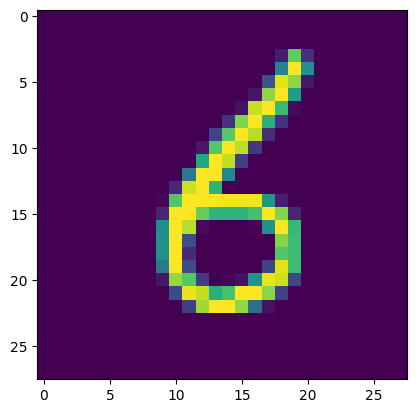

Prediction,  [3]
label,  3


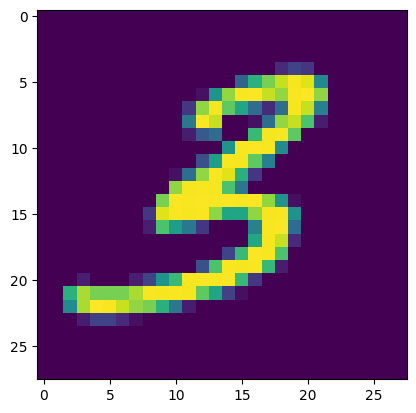

Prediction,  [4]
label,  7


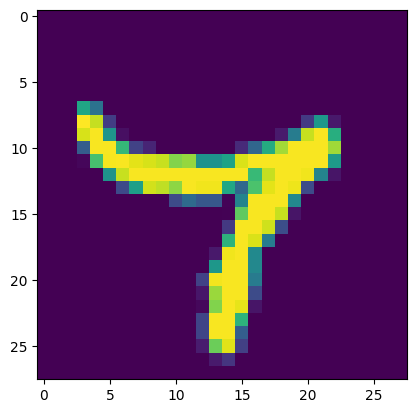

In [131]:
test_prediction(9, W1, B1, W2, B2)
test_prediction(157, W1, B1, W2, B2)
test_prediction(210, W1, B1, W2, B2)
test_prediction(100, W1, B1, W2, B2)

In [132]:
dev_predictions = make_prediction(X_dev, W1, B1, W2, B2)
get_accuracy(dev_predictions, Y_dev)

[3 5 5 3 0 1 1 5 7 5 8 8 7 1 0 1 1 9 3 9 3 5 3 8 7 5 8 1 7 9 7 8 5 6 5 4 0
 2 3 3 5 3 9 2 6 4 3 3 6 5 8 8 0 1 4 7 2 8 3 9 8 9 3 9 5 9 2 6 7 5 5 1 7 0
 3 1 5 9 2 0 3 1 0 8 9 4 7 8 7 0 9 1 0 0 7 3 0 3 3 8 9 2 3 7 3 6 4 0 9 4 7
 5 1 8 6 7 2 6 1 5 9 2 3 7 7 7 6 0 6 5 8 3 0 5 4 4 1 1 6 2 6 6 1 4 3 8 1 3
 1 1 6 3 3 2 6 9 8 2 3 6 6 9 5 8 8 2 2 3 8 6 9 6 8 4 8 9 1 4 7 1 4 1 5 7 6
 9 1 0 0 1 7 9 6 5 6 5 4 1 6 8 9 7 1 4 6 4 9 3 3 8 1 5 7 9 6 1 2 3 9 5 0 7
 4 8 2 8 5 3 0 2 1 9 6 3 2 0 8 6 2 1 3 7 7 2 6 6 3 6 3 9 7 2 5 7 2 7 6 0 8
 9 8 5 6 1 9 8 0 1 9 3 0 9 9 7 3 9 7 2 6 8 9 7 3 3 0 4 3 0 9 3 0 7 8 3 9 7
 0 8 7 1 4 4 0 9 2 5 2 8 1 6 8 8 1 7 8 9 5 5 9 7 2 5 8 3 4 3 3 9 5 8 6 6 9
 9 1 5 6 0 5 7 2 9 3 8 4 0 6 0 1 6 4 2 7 6 1 0 2 4 2 1 8 3 1 6 5 7 4 2 6 1
 1 3 5 6 5 2 4 2 9 3 5 3 8 0 3 1 6 2 6 3 2 6 4 2 3 4 2 6 4 3 5 4 3 3 4 6 1
 5 3 8 5 0 6 2 3 1 7 6 9 4 5 6 0 2 1 7 8 1 9 8 5 0 1 9 2 6 4 5 8 3 7 5 6 0
 1 7 0 9 3 2 1 3 0 3 9 0 5 7 1 1 8 5 1 6 7 1 8 6 3 0 8 9 4 3 2 4 5 9 9 3 6
 5 3 3 4 0 2 6 3 1 0 3 0 

0.899